# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.714  1  0.956 0.329 0.005   
                             age        0.126  1  0.169 0.681 0.001   
                             Kiel       2.457  1  3.289 0.071 0.017   
                             Magdeburg  5.150  1  6.894 0.009 0.035   
                             Sweden     7.770  1 10.401 0.001 0.052   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.638  1  0.740 0.391 0.004   
                             age        1.195  1  1.385 0.241 0.007   
                             Kiel       0.001  1  0.001 0.975 0.000   
                             Magdeburg  2.031  1  2.355 0.127 0.012   
                             Sweden    15.275  1 17.706 0.000 0.085   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.482  0.494    False  
                             age               0.167  0.792    False  
                             Kiel              1.147  0.162    False  
                             Magdeburg         2.029  0.032     True  
                             Sweden            2.829  0.007     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.408  0.552    False  
                             age               0.618  0.398    False  
                             Kiel              0.011  0.986    False  
                             Magdeburg         0.898  0.252    False  
                             Sweden            4.402  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.058  1  7.748 0.006 0.039   
                             age        0.005  1  0.038 0.845 0.000   
                             Kiel       0.266  1  1.950 0.164 0.010   
                             Magdeburg  0.471  1  3.450 0.065 0.018   
                             Sweden     1.693  1 12.394 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.493  1  4.444 0.036 0.023   
                             age        0.561  1  1.000 0.319 0.005   
                             Kiel       2.910  1  5.186 0.024 0.026   
                             Magdeburg  3.388  1  6.039 0.015 0.031   
                             Sweden    28.484  1 50.769 0.000 0.210   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.228  0.017     True  
                             age               0.073  0.901    False  
                             Kiel              0.785  0.269    False  
                             Magdeburg         1.189  0.128    False  
                             Sweden            3.269  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.440  0.079    False  
                             age               0.497  0.449    False  
                             Kiel              1.622  0.056    False  
                             Magdeburg         1.827  0.038     True  
                             Sweden           10.684  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.228  0.017     True   
                             age       0.845         0.073  0.901    False   
                             Kiel      0.164         0.785  0.269    False   
                             Magdeburg 0.065         1.189  0.128    False   
                             Sweden    0.001         3.269  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.036         1.440  0.079    False   
                             age       0.319         0.497  0.449    False   
                             Kiel      0.024         1.622  0.056    False   
                             Magdeburg 0.015         1.827  0.038     True   
                             Sweden    0.000        10.684  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.329         0.482  0.494    False  
                             age       0.681         0.167  0.792    False  
                             Kiel      0.071         1.147  0.162    False  
                             Magdeburg 0.009         2.029  0.032     True  
                             Sweden    0.001         2.829  0.007     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.391         0.408  0.552    False  
                             age       0.241         0.618  0.398    False  
                             Kiel      0.975         0.011  0.986    False  
                             Magdeburg 0.127         0.898  0.252    False  
                             Sweden    0.000         4.402  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.329     0.278     0.260         2.474     0.337
std       0.295         6.398     0.321     0.300         5.321     0.328
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.409     0.002     0.004         0.337     0.015
50%       0.060         1.222     0.120     0.124         0.908     0.247
75%       0.390         3.328     0.520     0.460         2.425     0.614
max       1.000        86.640     1.000     1.000       145.313     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.228   
A0A024R0T9;K7ER74;P02655                           AD     0.037         1.435   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.192         0.716   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.250         0.602   
A0A075B6H7                                         AD     0.005         2.262   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.194         0.712   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.948         0.023   
S4R3U6                                             AD     0.036         1.440   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.017     True   
A0A024R0T9;K7ER74;P02655                           AD      0.080    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.304    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.373    False   
A0A075B6H7                                         AD      0.016     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.307    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.968    False   
S4R3U6                                             AD      0.079    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.329         0.482   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.414   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.032         1.494   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.603         0.220   
A0A075B6H7                                         AD     0.085         1.069   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.014         1.842   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.577         0.239   
S4R3U6                                             AD     0.391         0.408   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.494    False  
A0A024R0T9;K7ER74;P02655                           AD      0.100    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.087    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.732    False  
A0A075B6H7                                         AD      0.187    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.240         1.606     0.300     0.254         1.404     0.337
std       0.292         1.898     0.316     0.291         1.656     0.315
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.006         0.376     0.018     0.013         0.358     0.043
50%       0.094         1.028     0.172     0.120         0.922     0.242
75%       0.421         2.192     0.550     0.439         1.871     0.596
max       0.999        24.538     0.999     1.000        23.434     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,936,1040


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.228  0.017   
A0A024R0T9;K7ER74;P02655                           0.037         1.435  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.192         0.716  0.304   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.250         0.602  0.373   
A0A075B6H7                                         0.005         2.262  0.016   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.194         0.712  0.307   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.948         0.023  0.968   
S4R3U6                                             0.036         1.440  0.079   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.329   
A0A024R0T9;K7ER74;P02655                              False 0.039   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.032   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.603   
A0A075B6H7                                             True 0.085   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.014   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.577   
S4R3U6                                                False 0.391   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.482  0.494   
A0A024R0T9;K7ER74;P02655                                   1.414  0.100   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.494  0.087   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.220  0.732   
A0A075B6H7                                                 1.069  0.187   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.842  0.046   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.184   
Q9Y6Y9                                                     0.239  0.711   
S4R3U6                                                     0.408  0.552   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    888
DAE (yes) - PI (yes)   333
DAE (yes) - PI (no)    152
DAE (no)  - PI (yes)    48
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.228  0.017     True 0.329   
A0A075B6H7                   0.005         2.262  0.016     True 0.085   
A0A075B6R2                   0.000         3.328  0.002     True 0.353   
A0A075B6S5                   0.012         1.939  0.030     True 0.298   
A0A075B7B8                   0.004         2.379  0.013     True 0.115   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.836         0.078  0.894    False 0.014   
Q9UP79                       0.000         4.302  0.000     True 0.324   
Q9UQ52                       0.001         3.217  0.002     True 0.085   
Q9Y6C2                       0.005         2.335  0.014     True 0.334   
Q9Y6X5                       0.194         0.712  0.307    False 0.014   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.482  0.494    False       186  
A0A075B6H7                           1.069  0.187    False        91  
A0A075B6R2                           0.452  0.516    False       164  
A0A075B6S5                           0.525  0.463    False       129  
A0A075B7B8                           0.938  0.235    False        57  
...                                    ...    ...      ...       ...  
Q9UNW1                               1.868  0.044     True       171  
Q9UP79                               0.490  0.489    False       135  
Q9UQ52                               1.070  0.186    False       188  
Q9Y6C2                               0.476  0.499    False       119  
Q9Y6X5                               1.842  0.046     True       173  

[200 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.017,0.494,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.080,0.100,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.304,0.087,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.373,0.732,196,DAE (no) - PI (no)
A0A075B6H7,0.016,0.187,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.317,197,DAE (no) - PI (no)
Q9Y6X5,0.307,0.046,173,DAE (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.184,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17931,0.017,0.982,174,DAE (yes) - PI (no),0.965
P51674;P51674-2;P51674-3,0.002,0.949,55,DAE (yes) - PI (no),0.948
P22692;P22692-2,0.036,0.982,170,DAE (yes) - PI (no),0.946
O15197;O15197-3,0.002,0.945,104,DAE (yes) - PI (no),0.944
Q96RW7;Q96RW7-2,0.917,0.010,80,DAE (no) - PI (yes),0.908
...,...,...,...,...,...
Q9NX62,0.045,0.056,197,DAE (yes) - PI (no),0.011
P00740;P00740-2,0.043,0.053,197,DAE (yes) - PI (no),0.011
K7ERI9;P02654,0.052,0.041,196,DAE (no) - PI (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


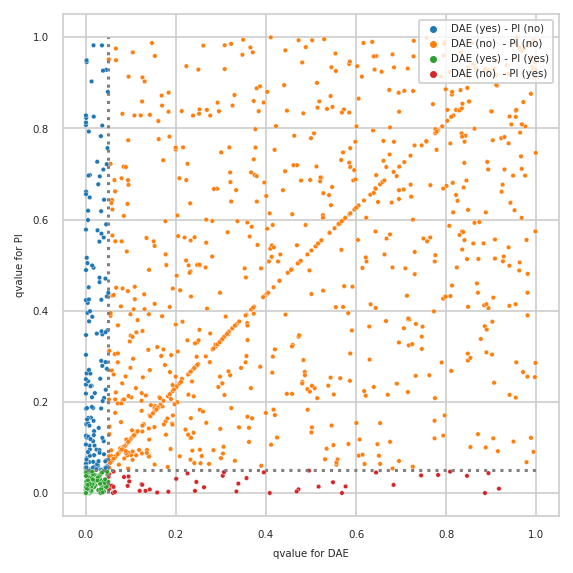

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


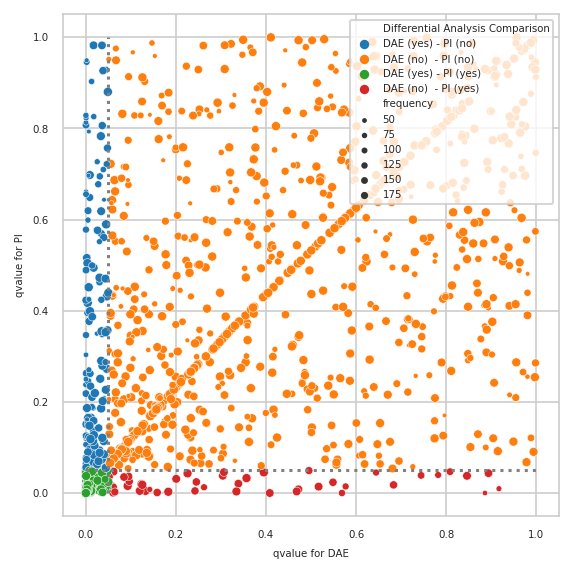

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out